In [1]:
import importlib
import MPS_sim_lib_pylib
importlib.reload(MPS_sim_lib_pylib)
from MPS_sim_lib_pylib import *

from database_lib_pylib import *
import database_lib_pylib
importlib.reload(database_lib_pylib)
from database_lib_pylib import *

# from correlators_compute.corr_ssh_comp import get_SSH_correlators_xx_yy, get_SSH_correlators
# from correlators_compute.corr_ssh_comp import get_correlators
import time
from IPython.display import clear_output

In [2]:
from dask_jobqueue import SGECluster
from dask.distributed import Client, fire_and_forget, Lock, get_client, LocalCluster, secede, rejoin
import dask, subprocess

matplotlib.rcParams['text.usetex'] = False
dask.config.set({"distributed.dashboard.link": "/proxy/{port}/status"})

In [3]:
# N_cores_per_job = 8
# tot_mem = N_cores_per_job*1#G
# tot_mem = 20
# mem_per_cor = tot_mem/N_cores_per_job
# cluster = SGECluster(cores=1,
#                      memory=str(tot_mem)+"GB",
#                      resource_spec=\
#                      'h_vmem='+str(mem_per_cor)+'G' + '\n'+\
#                      '#$ -pe openmp ' + str(N_cores_per_job) + '\n'+\
#                      '#$ -o output.dat' + '\n'+\
#                      '#$ -e error.dat',
#                      queue='std.q',
# #                      queue='short.q',
# #                      processes=2,
#                      interface='ib0',
# #                      walltime='1:00:00'
#                      walltime='48:00:00'
#                     )

N_cores_per_job = 8
# tot_mem = N_cores_per_job*1#G
tot_mem = 20
mem_per_cor = tot_mem/N_cores_per_job
cluster = SGECluster(cores=1,
                     memory=str(tot_mem)+"GB",
                     resource_spec=\
                     'h_vmem='+str(mem_per_cor)+'G' + '\n'+\
                     '#$ -pe openmp ' + str(N_cores_per_job) + '\n'+\
                     '#$ -o output.dat' + '\n'+\
                     '#$ -e error.dat',
#                      queue='std.q',
                     queue='short.q',
#                      processes=2,
                     interface='ib0',
#                      walltime='1:00:00'
                     walltime='10:00:00'
                    )

client_cluster = Client(cluster)
print(cluster.job_script())
cluster

#!/usr/bin/env bash

#$ -N dask-worker
#$ -q short.q
#$ -l h_vmem=2.5G
#$ -pe openmp 8
#$ -o output.dat
#$ -e error.dat
#$ -l h_rt=10:00:00
#$ -cwd
#$ -j y



/scratch/x2241057/miniconda3/bin/python -m distributed.cli.dask_worker tcp://192.168.39.101:45249 --nthreads 1 --memory-limit 20.00GB --name dask-worker--${JOB_ID}-- --death-timeout 60 --interface ib0



In [4]:
# client_cluster = get_client('tcp://192.168.39.101:42158')

In [5]:
# client_cluster.scheduler_info()

In [6]:
# client_cluster.get_scheduler_logs()

In [19]:
client_cluster.rebalance()

In [4]:
cluster.scale_up(20)

In [5]:
# cluster.scale_down(10)

In [13]:
def terminal(command):
    s=subprocess.getstatusoutput(command)
    print(s[1])

In [14]:
terminal('qstat')

job-ID  prior   name       user         state submit/start at     queue                          slots ja-task-ID 
-----------------------------------------------------------------------------------------------------------------
 134081 2.50916 dask-worke x2241057     r     10/17/2019 10:22:42 short.q@n045.intern.leo4.intra     8        
 134082 2.50508 dask-worke x2241057     r     10/17/2019 10:22:42 short.q@n045.intern.leo4.intra     8        
 134083 2.50372 dask-worke x2241057     r     10/17/2019 10:22:42 short.q@n045.intern.leo4.intra     8        
 134084 2.50304 dask-worke x2241057     r     10/17/2019 10:22:42 short.q@n044.intern.leo4.intra     8        
 134085 2.50263 dask-worke x2241057     qw    10/17/2019 10:22:31                                    8        
 134086 2.50236 dask-worke x2241057     qw    10/17/2019 10:22:31                                    8        
 134087 2.50217 dask-worke x2241057     qw    10/17/2019 10:22:31                                    8   

In [212]:
# terminal('qalter -w p 81039')

In [15]:
for i in range(134081, 134100+1):
    terminal('qdel ' + str(i))

x2241057 has registered the job 134081 for deletion
x2241057 has registered the job 134082 for deletion
x2241057 has registered the job 134083 for deletion
x2241057 has registered the job 134084 for deletion
x2241057 has deleted job 134085
x2241057 has deleted job 134086
x2241057 has deleted job 134087
x2241057 has deleted job 134088
x2241057 has deleted job 134089
x2241057 has deleted job 134090
x2241057 has deleted job 134091
x2241057 has deleted job 134092
x2241057 has deleted job 134093
x2241057 has deleted job 134094
x2241057 has deleted job 134095
x2241057 has deleted job 134096
x2241057 has deleted job 134097
x2241057 has deleted job 134098
x2241057 has deleted job 134099
x2241057 has deleted job 134100


In [1639]:
# cluster2 = cluster

In [48]:
cluster.close()

ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=CommClosedError('in <closed TCP>: ConnectionResetError: [Errno 104] Connection reset by peer')>
Traceback (most recent call last):
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/comm/tcp.py", line 194, in read
    n_frames = yield stream.read_bytes(8)
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 735, in run
    value = future.result()
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.throw(*exc_info)  # type: ignore
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/scheduler.py", line 2692, in broadcast
    [send_message(address) for address in addresses if address is not None]


In [28]:
client_cluster.restart()

Client Scheduler: tcp://192.168.39.101:41601 Dashboard: /proxy/8787/status,Cluster Workers: 10 Cores: 10 Memory: 200.00 GB


# Plot methods

In [3]:
def plot_data(data, N_sys_list, N_free_params_list, title = None, x_lable = None, y_lable = None, log_norm = False):
    xs, ys = N_sys_list, N_free_params_list
    plt.figure()
    
    norm = matplotlib.colors.LogNorm() if log_norm else None

    plt.imshow(data, origin='lower', interpolation="none", cmap=plt.cm.viridis_r, norm = norm)
    plt.xticks(np.arange(len(xs)), xs)  # need to set the ticks manually
    plt.yticks(np.arange(len(ys)), [str(y) for y in ys])
    plt.colorbar()
    
    if title is not None:
        plt.title(title)
    
    if x_lable is not None:
        plt.xlabel(x_lable)
    
    if y_lable is not None:
        plt.ylabel(y_lable)
    
    plt.show()

## Data methods

In [5]:
def replace_corrupted(path):
    path_str = [str(p) for p in path]
    for p in corrupter_path_list:
        n = len(p[0])
        if path_str[:n] == p[0]:
            path_str[:n] = p[1]
            return path_str
    return path
corrupter_path_list=[]

In [6]:
# def get_initila_data_traps( run_id, N_sys_0, N_traps_list, N_phon_list, mps_circ, model_args, MODEL_TAG, 
#                    opt_props, params_init_list):

#     N_traps_list = sorted(N_traps_list)[::-1]
#     optimize_tag = OPT_TAG_N_TRAPS
#     N_phon_list = sorted(N_traps_list)[::-1]
    
#     with Lock(DB_FILE_NAME_PHONONES):
#         req_group( [run_id], N_traps_list = N_traps_list, N_phon = N_phon, mps_circ = mps_circ, 
#                   model_args = model_args, MODEL_TAG = MODEL_TAG, opt_props = opt_props, 
#                   params_init_list = params_init_list, optimize_tag = optimize_tag, N_sys_0 = N_sys_0)
    
#     subgroup_names_list = ['with_traps', 'without_traps']
#     sim_args = params_init_list, subgroup_names_list, N_traps_list, optimize_tag, \
#     N_sys_0, mps_circ, model_args, MODEL_TAG, opt_props, n_phon 
    
#     return get_initila_data(run_id, sim_args)

# def get_initila_data_traps( run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
#                    opt_props, optimize_tag, params_init_list, dim_aux = None, is_MS = False):
    
#     optimize_param_list = sorted(optimize_param_list)[::-1]
#     multyqub = False
    
#     with Lock(DB_FILE_NAME_PHONONES):
#         req_group( [run_id], optimize_param_list = optimize_param_list, fixed_param = fixed_param, 
#                   MODEL_TAG = MODEL_TAG, model_args = model_args, N_params_list = N_params_list, params_init_list = params_init_list,
#                   mps_circ = mps_circ, opt_props = opt_props, optimize_tag = optimize_tag, multyqub = multyqub, dim_aux = dim_aux, is_MS = is_MS)
    
#     sim_args = params_init_list, N_params_list, optimize_param_list, optimize_tag, multyqub, fixed_param, mps_circ, model_args, MODEL_TAG, opt_props, dim_aux, is_MS
#     return get_initila_data(run_id, sim_args)


In [7]:
# def get_simulator_to_optimze_sevearl_traps(run_id, ind_subgr_name, ind_traps, sim_args):
    
#     subgroup_names_list, N_traps_list = sim_args[1:3]
#     subgr_name = subgroup_names_list[ind_subgr_name]
#     N_traps = N_traps_list[ind_traps]
    
#     with_traps = subgr_name == 'with_traps'
    
#     N_sys_0, mps_circ, model_args, MODEL_TAG, opt_props, n_phon = sim_args[4:10]
#     N_sys = N_sys_0 * N_traps
    
#     if with_traps:
#         simulator_mps = get_MPS_simulator_with_traps(N_sys, mps_circ, model_args, MODEL_TAG, 
#                                                  opt_props, n_phon = n_phon, N_traps=N_traps, is_free=True)
#     else:
#         simulator_mps = get_MPS_simulator(N_sys, mps_circ, model_args, MODEL_TAG, 
#                                                  opt_props, n_phon = n_phon)
#     return simulator_mps

def submit_optimization(run_id, ind_param, ind_opt, ind_p_init, sim_args):
        
    path = replace_corrupted([run_id, ind_param, ind_opt]) + [ind_p_init]
    
    with Lock(DB_FILE_NAME_PHONONES):
        if is_exist(path):
            return
    
    optimize_tag = sim_args[3]
#     if optimize_tag == OPT_TAG_N_TRAPS:
#         simulator = get_simulator_to_optimze_sevearl_traps(run_id, ind_param, ind_opt, sim_args)
#     else:
    simulator = get_simulator_to_optimze(run_id, ind_param, ind_opt, sim_args)
    params_init_list = sim_args[0]
    
    path_2 = replace_corrupted([run_id, ind_param])
    with Lock(DB_FILE_NAME_PHONONES):
        req_group( path_2 )
        set_attrs( path_2, N_free_params = simulator.N_free_params)

    params_init = params_init_list[ind_p_init]
    start_optimization(simulator, params_init, path)
    
    del simulator
    
def start_optimization(simulator, params_init, path):

    with Lock(DB_FILE_NAME_PHONONES):
        if is_exist(path):
            return 
    simulator.set_params_init(params_init)
#     my_print(str(path),file_name='logs')
    simulator.opt_props.print_data = True
    simulator.opt_props.file_logs = 'Logs/'+str(path)
    result = simulator.optimize_params( )
    params_opt = result.res.x

    N_sys = simulator.system.N_sys
    try:
        E = result.E
    except:
        E = result.E_N_iter

    with Lock(DB_FILE_NAME_PHONONES):
        req_group( path, params_opt = params_opt, E = E)

        
    del result, simulator
    
def get_initila_data(run_id, sim_args):
    
    params_init_list, N_params_list, optimize_param_list = sim_args[:3]
    
    client = get_client()
    create_file()
    
    future_list = []
    N_y, N_x, N_z = len(N_params_list), len(optimize_param_list), len(params_init_list)
    for ind_param, N_params in enumerate(N_params_list):
        for ind_opt, optimize_param in enumerate(optimize_param_list):
            for ind_p_init, params_init in enumerate(params_init_list):
                with Lock(DB_FILE_NAME_PHONONES):
                    future = client.submit(submit_optimization, run_id, ind_param, ind_opt, ind_p_init, sim_args, pure = False)
                    fire_and_forget(future)
                    future_list += [future]
            
    return future_list


OPT_TAG_N_SYS = 1
OPT_TAG_N_PHON = 2
OPT_TAG_N_TRAPS = 3
def get_initila_data_MPS( run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
                   opt_props, optimize_tag, params_init_list, dim_aux = None, is_MS = False):
    
    if optimize_tag == OPT_TAG_N_TRAPS:
        N_params_list = sorted(N_params_list)[::-1]
        
    optimize_param_list = sorted(optimize_param_list)[::-1]
    multyqub = False
    
    with Lock(DB_FILE_NAME_PHONONES):
        req_group( [run_id], optimize_param_list = optimize_param_list, fixed_param = fixed_param, 
                  MODEL_TAG = MODEL_TAG, model_args = model_args, N_params_list = N_params_list, params_init_list = params_init_list,
                  mps_circ = mps_circ, opt_props = opt_props, optimize_tag = optimize_tag, multyqub = multyqub, dim_aux = dim_aux, is_MS = is_MS)
    
    sim_args = params_init_list, N_params_list, optimize_param_list, optimize_tag, multyqub, fixed_param, mps_circ, model_args, MODEL_TAG, opt_props, dim_aux, is_MS
    return get_initila_data(run_id, sim_args)

def get_initila_data_MQ( run_id, N_lays_list, N_sys_list, edge_size, model_args, MODEL_TAG, 
                   opt_props, params_init_list, alpha):
    
    optimize_param_list = N_sys_list
    optimize_param_list = sorted(optimize_param_list)[::-1]
    optimize_tag = OPT_TAG_N_SYS
    fixed_param = 0
    
    multyqub = True
    with Lock(DB_FILE_NAME_PHONONES):
        req_group( [run_id], N_params_list = N_lays_list, optimize_param_list = optimize_param_list, edge_size = edge_size, model_args = model_args, MODEL_TAG = MODEL_TAG, 
                   opt_props = opt_props, params_init_list = params_init_list, alpha = alpha, optimize_tag = optimize_tag, multyqub = multyqub)
    
    sim_args = params_init_list, N_lays_list, optimize_param_list, optimize_tag, multyqub, fixed_param, edge_size, opt_props, MODEL_TAG, model_args, alpha
    return get_initila_data(run_id, sim_args)

def get_simulator_to_optimze(run_id, ind_param, ind_opt, sim_args, n_phon_pur = None):

    N_params_list, optimize_param_list, optimize_tag, multyqub, fixed_param = sim_args[1:6]
    if optimize_tag == OPT_TAG_N_TRAPS:
        N_params_list = sorted(N_params_list)[::-1]
        
    optimize_param = optimize_param_list[ind_opt]
    N_params = N_params_list[ind_param]
    
    
    if optimize_tag == OPT_TAG_N_TRAPS:
        N_sys = np.min(N_params_list)
        N_traps = N_params//N_sys
        n_phon = optimize_param
        N_params = fixed_param
    elif optimize_tag == OPT_TAG_N_SYS:
        N_sys = optimize_param
        n_phon = fixed_param
    else:
        N_sys = fixed_param
        n_phon = optimize_param
    
    
    if multyqub:
        edge_size, opt_props, MODEL_TAG, model_args, alpha = sim_args[6:11]
        simulator = get_multiqub_simulator(N_sys, N_layers = N_params, 
                                    edge_size = edge_size, opt_props= opt_props, model_tag = MODEL_TAG, 
                                    model_args = model_args, alpha = alpha)
    else:
        mps_circ, model_args, MODEL_TAG, opt_props, dim_aux, is_MS = sim_args[6:12]
        mps_circ.N_bulk_gates = N_params
        
        if optimize_tag == OPT_TAG_N_TRAPS:
#             my_print('N_sys = ' + str(N_sys) + ', n_phon = ' + str(n_phon)  + ', N_traps = ' + str(N_traps), file_name = '435' )
            simulator = get_MPS_simulator_with_traps(N_sys * N_traps, mps_circ, model_args, MODEL_TAG, 
                                                 opt_props, n_phon = n_phon, N_traps=N_traps, is_free=True)
            my_print('dddd: '+str(simulator.N_free_params), file_name = '435' )
            
        elif is_MS:
            simulator = get_MPS_with_MS_simulator(N_sys, mps_circ, opt_props, MODEL_TAG, model_args)
        else:
            simulator = get_MPS_simulator(N_sys, mps_circ, model_args, MODEL_TAG, opt_props, n_phon = n_phon, dim_aux = dim_aux, n_phon_pur = n_phon_pur)
#         simulator = get_MPS_simulator(N_sys, mps_circ, model_args, MODEL_TAG, opt_props, n_phon = n_phon, dim_aux = 6)
    return simulator

In [8]:
def submit_calculate_inF_and_cors(run_id, do_inF, do_cors, n_phon_pur = None):
    
    sim_args, N_params_range, optimize_param_range = get_sim_args(run_id)
    
    client = get_client()
    
    future_list = []
    for ind_param in N_params_range:
        for ind_opt in optimize_param_range:
#         for ind_opt in [optimize_param_range[0]]:
#         for ind_opt in optimize_param_range[:-1]:
            future = client.submit(calculate_inF_and_cors, run_id, ind_param, ind_opt, sim_args, do_inF, do_cors, n_phon_pur = n_phon_pur, pure = False)
            future_list += [future]
    return future_list
            
def calculate_inF_and_cors(run_id, ind_param, ind_opt, sim_args, do_inF, do_cors, n_phon_pur = None):
    path_list = replace_corrupted([run_id, ind_param, ind_opt])
    with Lock(DB_FILE_NAME_PHONONES):
        if not is_exist(path_list):
            return
    params_opt, E_min = get_data_min_E(path_list)
    
    simulator = get_simulator_to_optimze(run_id, ind_param, ind_opt, sim_args, n_phon_pur = n_phon_pur)
    
    multyqub = sim_args[4]
    MODEL_TAG = sim_args[8]
    
    if not multyqub:
        simulator_mps = simulator
    
    sim_res = None
    if do_inF:
        if not multyqub:
            simulator = simulator_mps.to_simulator()
            
        sim_res = simulator.simulation(params_opt, return_F = True)
        inF = 1-sim_res.F
        
        rho_q = sim_res.rho_out.to_qobj()
        n = get_q_N_mode(rho_q)
        rho = rho_q.ptrace(range(1,n))
        inP = 1-(rho*rho).tr()
        
        with Lock(DB_FILE_NAME_PHONONES):
            set_attrs(path_list, inF = inF, inP = inP, E_min = E_min, params_opt = params_opt)
    
    if do_cors:
        if MODEL_TAG == TAG_SSH_P:
            P_name = Px_name
        if MODEL_TAG == TAG_SCHWING:
            P_name = Pz_name
            
        if not multyqub:    
            E_cors = 0
            pur_val = np.nan
            entr_val = np.nan
            var_val = np.nan
            n_val = np.nan
            norm_div = np.nan
#             E_cors, data = double_correlators_MPS(simulator_mps, params_opt, P_name, with_aux_state = True)
            
#             rho = Qobj(data)
#             entr_val = entropy.entropy_vn(rho)
#             pur_val = purity(rho)
            
#             a = destroy(rho.dims[0][0])
#             n = a.dag()*a
#             nn = n*n
            
#             n_val = (n*rho).tr()
#             nn_val = (nn*rho).tr()
#             var_val = nn_val - n_val**2
            
#             norm_div = (simulator.system.state_in_list[0][0] - rho).norm()
            
        else:
            if sim_res is None:
                sim_res = simulator.simulation(params_opt, return_F = True)
                
            E_cors = double_correlators_MQ(simulator, params_opt, P_name)
            pur_val = np.nan
            entr_val = np.nan
            var_val = np.nan
            n_val = np.nan
            norm_div = np.nan
        
        if n_phon_pur is None:
            with Lock(DB_FILE_NAME_PHONONES):
                set_attrs(path_list, E_cors = E_cors, E_min = E_min, params_opt = params_opt, pur_val = pur_val, entr_val = entr_val, var_val = var_val, n_val = n_val, norm_div = norm_div)
        else:
            E_min_n_pon_pur = simulator_mps.simulation(params_opt).E
            with Lock(DB_FILE_NAME_PHONONES):
                if n_phon_pur == 0:
                    set_attrs( path_list, E_min_n_pon_pur_0 = E_min_n_pon_pur)
                if n_phon_pur == 1:
                    set_attrs( path_list, E_min_n_pon_pur_1 = E_min_n_pon_pur)
                if n_phon_pur == 2:
                    set_attrs( path_list, E_min_n_pon_pur_2 = E_min_n_pon_pur)

In [10]:
# cluster.close()

N_cores_per_job = 4
# tot_mem = N_cores_per_job*1#G
tot_mem = 20
mem_per_cor = tot_mem/N_cores_per_job
cluster = SGECluster(cores=1,
                     memory=str(tot_mem)+"GB",
                     resource_spec=\
                     'h_vmem='+str(mem_per_cor)+'G' + '\n'+\
                     '#$ -pe openmp ' + str(N_cores_per_job) + '\n'+\
                     '#$ -o output.dat' + '\n'+\
                     '#$ -e error.dat',
#                      queue='std.q',
                     queue='short.q',
#                      processes=2,
                     interface='ib0',
#                      walltime='1:00:00'
                     walltime='10:00:00'
                    )

cluster.scale_up(20)
client_cluster = Client(cluster)

/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [16]:
cluster

In [13]:
run_id = 5478389741
res_62 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_0_B', reverse = True, pure = False)

In [21]:
res_62.result()

array([[<Future: status: pending, key: submit_re_optimization-2170673c-2ea1-43bc-85bf-e192796aec74>,
        <Future: status: pending, key: submit_re_optimization-8558d765-6499-4017-964f-a81ef4625b0c>,
        <Future: status: pending, key: submit_re_optimization-c3649f0e-5534-489a-a761-cd341b83e1ed>],
       [<Future: status: pending, key: submit_re_optimization-6c43c487-ef0a-49ca-b761-6e0fa4871dd3>,
        <Future: status: pending, key: submit_re_optimization-67454e41-7192-4b92-b998-f56afa5a8fa0>,
        <Future: status: pending, key: submit_re_optimization-1f929336-2faf-484d-8f78-200e8c41ed5f>],
       [<Future: status: pending, key: submit_re_optimization-17d2b4f6-ff94-451b-817c-b2cea7147a40>,
        <Future: status: pending, key: submit_re_optimization-33c1cd3d-a7fb-4c08-a4e6-5ce2f8b3a828>,
        <Future: status: pending, key: submit_re_optimization-1051f126-1532-4182-bf58-37bb763d63f9>],
       [<Future: status: pending, key: submit_re_optimization-23fbae0d-c81b-4c2f-bb4a-9c

In [190]:
 res_61.result()[0,1].result()

In [43]:
get_subgroup_names([run_id,3,0])

['0', '1', '2', '3', '4', 'reopt_6_F_0']

In [44]:
get_group_attrs_names([run_id,3,0,'reopt_6_F_0'])

['E', 'params_opt']

In [49]:
get_group_attrs([run_id,3,0,'reopt_6_F_0'],'E')

-36.82577577538332

In [155]:
sim_args, N_params_range, optimize_param_range = get_sim_args(run_id, reverse = False)

In [131]:
N_params_list, optimize_param_list = sim_args[1:3]

In [156]:
optimize_tag = sim_args[3]

In [161]:
optimize_tag == OPT_TAG_N_TRAPS

True

In [159]:
OPT_TAG_N_TRAPS

3

In [132]:
optimize_param_list

[0.01, 0.005, 0.0]

In [133]:
N_params_list

[6, 12, 18, 24, 30]

In [108]:
sim_args, N_params_range, optimize_param_range = get_sim_args(76323266633, reverse = False)

In [109]:
N_params_list, optimize_param_list = sim_args[1:3]

In [110]:
optimize_param_list

[30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6]

In [111]:
N_params_list

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [9]:
def submit_re_optimization(run_id, ind_param, ind_opt, futures_depend, sim_args, reverse, reopt_id):

    N_params_list, optimize_param_list = sim_args[1:3]
    
    optimize_tag = sim_args[3]
    if optimize_tag == OPT_TAG_N_TRAPS:
        N_params_list = sorted(N_params_list)[::-1]
        
        
#     my_print(str(N_params_list), file_name = '435' )
#     my_print(str(optimize_param_list), file_name = '435' )
    
    inds_list = get_depends_inds_list(ind_param, ind_opt, len(N_params_list), len(optimize_param_list), reverse)
    if len(inds_list) == 0:
        return
    
    path_list = [replace_corrupted([run_id, ind_param, ind_opt]) + [str(reopt_id) +'_'+ str(j)]
                for j in range(len(inds_list))]
    
    if ind_opt == 0:
        path_list += [[run_id, ind_param, ind_opt, str(reopt_id) +'_spec_'+ str(len(inds_list))]]
    
    
    with Lock(DB_FILE_NAME_PHONONES):
        if all([is_exist(path) for path in path_list]):
            return 
        
    client = get_client()
#     client = client_cluster
    
    secede()
    client.gather(futures_depend)
    rejoin()
    
    multyqub = sim_args[4]
    simulator = get_simulator_to_optimze(run_id, ind_param, ind_opt, sim_args)
    simulator.opt_props.maxiter = 1
    simulator.opt_props.tol_rel = 1e-2
    
    N_sys = simulator.system.N_sys
    path = [run_id, ind_param, ind_opt]
    
    params_init_list_new = [get_data_min_E([run_id] + inds)[0] for inds in inds_list]
    
    
    if ind_opt == 0:
        params_init_list_new += [get_group_attrs([76323266633,8,ind_param*3], 'params_opt')]
        inds_list = list(inds_list) + [0]
    
    for i, params_init in enumerate(params_init_list_new):
        if len(params_init) != simulator.N_free_params:
            if not multyqub:
                mps_circ = sim_args[6]
                is_MS = sim_args[11]
                if optimize_tag == OPT_TAG_N_TRAPS:
                    if simulator.N_free_params > len(params_init):
                        params_init_list_new[i] = list(params_init) + [0,0]
                    else:
                        params_init_list_new[i] = params_init[:-2]
                elif is_MS:
                    params_init_list_new[i] = promote_params_MPS_with_MS(params_init, mps_circ, N_params_list[ind_param], reverse)
#                     my_print(str([simulator.N_free_params, len(params_init_list_new[i])]), file_name='1111')
                else:
                    params_init_list_new[i] = promote_params_MPS(params_init, mps_circ, N_params_list[ind_param], reverse)
            else:
                edge_size = sim_args[6]
                N_params_per_lay = min(edge_size + 2, 1 + N_sys//2)
                params_init_list_new[i] = promote_params_MQ(params_init, N_params_per_lay, reverse)
    

    futures_list = []
    for j, inds in enumerate(inds_list):
        
        path = path_list[j]
        future = client.submit(start_optimization, simulator, params_init_list_new[j], path, pure = False, priority=10)
        futures_list += [future]
        
    secede()
    client.gather(futures_list)
    rejoin()
    
    del simulator

def get_sim_args(run_id, reverse = False):
    with Lock(DB_FILE_NAME_PHONONES):
        multyqub, optimize_param_list, N_params_list, params_init_list = \
        get_group_attrs([run_id], 'multyqub', 'optimize_param_list', 'N_params_list', 'params_init_list')

        params_init_list, optimize_tag, MODEL_TAG, model_args, opt_props = \
        get_group_attrs([run_id], 'params_init_list', 'optimize_tag', 'MODEL_TAG', 'model_args', 'opt_props')
            
        optimize_param_list = sorted(optimize_param_list)[::-1]
        N_params_list = sorted(N_params_list)

        N_y, N_x, N_z = len(N_params_list), len(optimize_param_list), len(params_init_list)

        optimize_param_range = np.arange(N_x)
        N_params_range = np.arange(N_y)
        if reverse:
            optimize_param_range = optimize_param_range[::-1]
            N_params_range = N_params_range[::-1]

        if multyqub:

            edge_size, alpha = get_group_attrs([run_id], 'edge_size', 'alpha')
            fixed_param = 0

            sim_args = params_init_list, N_params_list, optimize_param_list, optimize_tag, multyqub, \
            fixed_param, edge_size, opt_props, MODEL_TAG, model_args, alpha
        else:
            
            try:
                mps_circ, fixed_param, is_MS = get_group_attrs([run_id], 'mps_circ', 'fixed_param', 'is_MS')
            except:
                mps_circ, fixed_param = get_group_attrs([run_id], 'mps_circ', 'fixed_param')
                is_MS = False
            
            try:
                dim_aux = get_group_attrs([run_id], 'dim_aux')
            except:
                dim_aux = None
            
            sim_args = params_init_list, N_params_list, optimize_param_list, optimize_tag, multyqub, \
            fixed_param, mps_circ, model_args, MODEL_TAG, opt_props, dim_aux, is_MS
        
    return sim_args, N_params_range, optimize_param_range

def reoptimize_data( run_id, reopt_id, reverse = False):
    
    sim_args, N_params_range, optimize_param_range = get_sim_args(run_id, reverse = reverse)
    N_y, N_x = len(N_params_range), len(optimize_param_range)
    
    client = get_client()
    futures_array = np.zeros([N_y, N_x], dtype='O')
    for ind_param in N_params_range:
        for ind_opt in optimize_param_range:
            inds_list = get_depends_inds_list(ind_param, ind_opt, N_y, N_x, reverse)
            futures_depend = [futures_array[inds[0], inds[1]] for inds in inds_list]

            future_reopt = client.submit(submit_re_optimization, run_id, ind_param, 
                    ind_opt, futures_depend, sim_args, reverse, reopt_id, pure = False)
            fire_and_forget(future_reopt)
            time.sleep(0.1)
            futures_array[ind_param, ind_opt] = future_reopt
            
    return futures_array
    
def get_depends_inds_list(ind_param, ind_opt, N_params, N_opts, reverse = False):
    inds_list = []
    if reverse:
        if ind_param < N_params-1:
            inds_list += [[ind_param+1, ind_opt]]
        if ind_opt < N_opts-1:
            inds_list += [[ind_param, ind_opt+1]]
    else:
        if ind_param > 0:
            inds_list += [[ind_param-1, ind_opt]]
        if ind_opt > 0:
            inds_list += [[ind_param, ind_opt-1]]
        
    return inds_list 

def promote_params_MQ(params, N_params_per_lay, reverse):
    if reverse:
        params_out = params[:-N_params_per_lay]
    else:
        params_out = list(params) + [0]*N_params_per_lay
        
    return params_out

def promote_params_MPS_old(params, mps_circ, N_params_bulk_new, reverse):
    if reverse:
        N_params_bulk_old = N_params_bulk_new

        if N_params_bulk_old%2 == 0:
            ind = mps_circ.size_edge_L * mps_circ.N_lays_edge_L + N_params_bulk_old//2
        else:
            ind = mps_circ.size_edge_L * mps_circ.N_lays_edge_L + N_params_bulk_old

        params_out = list(params)
        
        del params_out[ind]
    else:
        N_params_bulk_old = N_params_bulk_new - 1

        if N_params_bulk_old%2 == 0:
            ind = mps_circ.size_edge_L * mps_circ.N_lays_edge_L + N_params_bulk_old//2
        else:
            ind = mps_circ.size_edge_L * mps_circ.N_lays_edge_L + N_params_bulk_old

        params = list(params)
        params_out = params[:ind] + [0] + params[ind:]
    
    return params_out

def promote_params_MPS(params, mps_circ, N_params_bulk_new, reverse):
    if reverse:
        N_params_bulk_old = N_params_bulk_new
        ind = mps_circ.size_edge_L * mps_circ.N_lays_edge_L + N_params_bulk_old//2
        
        s = mps_circ.size_block
        n_bulk = mps_circ.N_bulk_gates
    
        x = ( n_bulk-2)/(2*(s-1))%2
        if x <= 1 and x > 0: 
            ind += N_params_bulk_old%2
            
        params_out = list(params)
        
        del params_out[ind]
    else:
        N_params_bulk_old = N_params_bulk_new - 1
        
        ind = mps_circ.size_edge_L * mps_circ.N_lays_edge_L + N_params_bulk_old//2

        s = mps_circ.size_block
        n_bulk = mps_circ.N_bulk_gates
    
        x = ( n_bulk-2)/(2*(s-1))%2
        if x <= 1 and x > 0: 
            ind += N_params_bulk_old%2
            
        params = list(params)
        params_out = params[:ind] + [0] + params[ind:]
    
    return params_out

In [10]:
def promote_params_MPS_with_MS(params, mps_circ, N_lays_bulk_new, reverse):
    if reverse:
        N_lays_bulk_old = N_lays_bulk_new

        N_param_lay_bulk = mps_circ.size_block+1
        N_param_lay_edge = mps_circ.size_edge_L+1
        if N_lays_bulk_old%2 == 0:
            ind = N_param_lay_edge * mps_circ.N_lays_edge_L + N_param_lay_bulk * N_lays_bulk_old//2
        else:
            ind = N_param_lay_edge * mps_circ.N_lays_edge_L + N_param_lay_bulk * N_lays_bulk_old

        params_out = list(params)
        
        del params_out[ind:ind + N_param_lay_bulk]
    else:
        N_lays_bulk_old = N_lays_bulk_new - 1

        N_param_lay_bulk = mps_circ.size_block+1
        N_param_lay_edge = mps_circ.size_edge_L+1
        if N_lays_bulk_old%2 == 0:
            ind = N_param_lay_edge * mps_circ.N_lays_edge_L + N_param_lay_bulk * N_lays_bulk_old//2
        else:
            ind = N_param_lay_edge * mps_circ.N_lays_edge_L + N_param_lay_bulk * N_lays_bulk_old

        params = list(params)
        params_out = params[:ind] + N_param_lay_bulk*[0] + params[ind:]
    
    return params_out

In [11]:
def get_data_min_E(path_list_x):
    path_list_x = replace_corrupted(path_list_x)
    with Lock(DB_FILE_NAME_PHONONES):
        names_list = get_subgroup_names(path_list_x)
        
    E_list = []
    for name in names_list:
        path_list_z = path_list_x + [name]
        
        with Lock(DB_FILE_NAME_PHONONES):
            if is_exist(path_list_z):
                if 'E' in get_group_attrs_names(path_list_z):
                    E_list += [get_group_attrs(path_list_z, 'E')]
                else:
                    E_list += [np.nan]
            else:
                E_list += [np.nan]

    ind_min = np.nanargmin(np.array(E_list))
    path_list_z_min = path_list_x + [names_list[ind_min]]
    
    try:
        with Lock(DB_FILE_NAME_PHONONES):
            params_opt, E = get_group_attrs(path_list_z_min, 'params_opt', 'E')
    except:
        my_print(str(path_list_z_min), file_name = '435')
        
    return params_opt, E

def retreave_data(run_id):
    N_free_params_list = []
    
    path_list = [run_id]
    
    with Lock(DB_FILE_NAME_PHONONES):
        optimize_param_list, optimize_tag, N_params_list, params_init_list = \
        get_group_attrs(path_list, 'optimize_param_list', 'optimize_tag', 'N_params_list', 'params_init_list')
    
    y, x, z = len(N_params_list), len(optimize_param_list), len(params_init_list)
    
    E_cors_list_list = np.zeros([y, x], dtype = 'O')
    inF_list_list = np.zeros([y, x])
    E_list_list = np.zeros([y, x])
    
    E_cors_list_list[:] = np.nan
    inF_list_list[:] = np.nan
    E_list_list[:] = np.nan
    
    for ind_y in range(y):

        path_list_y = path_list + [ind_y]

        try:
            with Lock(DB_FILE_NAME_PHONONES):
                N_free_params = get_group_attrs(path_list_y, 'N_free_params')
        except:
            N_free_params = 0

        E_cors_list = []
        for ind_x in range(x):
            path_list_x = path_list_y + [ind_x]
            try:
                params_opt, E = get_data_min_E(path_list_x)

#                     E_cors_list_list[ind_y, ind_x] = E_cors
#                     inF_list_list[ind_y, ind_x] = inF
                E_list_list[ind_y, ind_x] = E
            except:
                continue

        N_free_params_list += [N_free_params]


    optimize_param_list = optimize_param_list[::-1]
#         inF_list_list = inF_list_list[::,::-1]
    E_list_list = E_list_list[::,::-1]
#         E_cors_list_list = [E_cors_list[::-1] for E_cors_list in E_cors_list_list]
    
    return N_free_params_list, E_list_list, optimize_param_list, optimize_tag

In [12]:
def print_structure(run_id):
    with Lock(DB_FILE_NAME_PHONONES):
        names_list_1 = get_subgroup_names([run_id])
        for name_1 in names_list_1:
            names_list_2 = get_subgroup_names(replace_corrupted([run_id, name_1]))
            for name_2 in names_list_2:
                names_list_3 = get_subgroup_names(replace_corrupted([run_id, name_1, name_2]))
                print([name_1, name_2], names_list_3)
                for name_3 in names_list_3:
                    path = [name_1, name_2, name_3]
                    try:
                        is_exist(path)
                    except:
                        print('err :',path)

# Performance

In [12]:
opt_props = Optimiz_props( tol_rel = 1e-4, maxiter = 1, print_data=False)
MODEL_TAG = TAG_SSH_P
params_init_list = 10**np.linspace(np.log10(0.001), np.log10(0.1), 3)
N_sys_list = np.arange(6,14,2)  

## MPS

In [224]:
N_params_list = np.arange(6,21)
n_phon = 0.01
mps_circ = MPS_Circuit(size_block = 3, N_bulk_blocks = 2)

optimize_tag = OPT_TAG_N_SYS
optimize_param_list = N_sys_list
fixed_param = n_phon

### t_- = 0.2

In [225]:
model_args = [1, 0.2, 0.1]
# run_id = 746782
run_id = 6662737382
# delete_group(run_id)

res_1 = client_cluster.submit(get_initila_data_MPS, run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
                   opt_props, optimize_tag, params_init_list, pure = False)

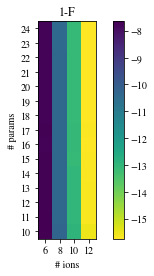

In [249]:
run_id = 6662737382
N_free_params_list, E_list_list, optimize_param_list, optimize_tag = retreave_data(run_id)
plot_data(E_list_list, optimize_param_list, N_free_params_list, title = '1-F', x_lable = '# ions', y_lable = '# params', log_norm = False)

In [228]:
res_1.result()

[<Future: status: finished, key: submit_optimization-b8026423-c345-4b72-b5c1-c14b45020c9c>,
 <Future: status: finished, key: submit_optimization-24770e84-d0e1-413d-b35c-e5dc6c5463a3>,
 <Future: status: finished, key: submit_optimization-b80bf12f-2a07-4b93-abc1-7c7e760ac5b3>,
 <Future: status: finished, key: submit_optimization-8c993a65-1005-409d-9c07-42b02ac47b25>,
 <Future: status: finished, key: submit_optimization-a7cfa1f2-a6ef-4c3e-8e57-8122fe45aa03>,
 <Future: status: finished, key: submit_optimization-8cf6e717-c66a-498a-9772-45d99ee79e45>,
 <Future: status: finished, key: submit_optimization-20da3b1d-4060-4135-8fef-16990d39ddbc>,
 <Future: status: finished, key: submit_optimization-f98601d8-49fd-4896-96e0-4e9816d2eefe>,
 <Future: status: finished, key: submit_optimization-8b2cf583-6795-46d4-a307-3365921c2005>,
 <Future: status: finished, key: submit_optimization-dba1208d-a29c-4d4f-b1c3-8ac8b1e3bab5>,
 <Future: status: finished, key: submit_optimization-6467fe8f-c3e5-4643-966a-782

In [227]:
sum(r.status is not 'finished' for r in res_1.result())

0

In [206]:
# run_id = 746782
# res_1 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_4_F', reverse = False, pure = False)
run_id = 6662737382
res_11 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_2_F', reverse = False, pure = False)
res_12 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_2_B', reverse = True, pure = False)

In [162]:
# res_1.result()[0][1].result()
res_11.result()

array([[<Future: status: finished, key: submit_re_optimization-ba207c41-c023-45ad-8281-e08fb6fe2592>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-6d0dc833-0e50-41c1-b361-5db8444a5546>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-f66b45df-b012-4194-a7cb-8fc8a2805b18>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-3bfe8095-d88d-4614-8eef-830bb738fe2c>],
       [<Future: status: finished, type: NoneType, key: submit_re_optimization-cecc4064-99d6-4453-a816-5e9613ba1d9b>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-aa11f93b-306b-4653-bae2-b9996b8ba5a5>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-dfd4f811-727a-4694-b617-dbecde1e3da5>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-da89a8da-069f-47b8-81c5-a1408dc07558>],
       [<Future: status: finished, type: NoneType, key: submit_re_opti

In [1873]:
# print_structure(746782)

### t_- = 0.5

In [229]:
model_args = [1, 0.5, 0.1]
# run_id = 93761231
run_id = 2324320882
# delete_group(run_id)

res_2 = client_cluster.submit(get_initila_data_MPS, run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
                   opt_props, optimize_tag, params_init_list, pure = False)

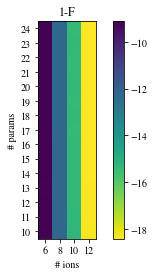

In [329]:
run_id = 2324320882
N_free_params_list, E_list_list, optimize_param_list, optimize_tag = retreave_data(run_id)
plot_data(E_list_list, optimize_param_list, N_free_params_list, title = '1-F', x_lable = '# ions', y_lable = '# params', log_norm = False)

In [205]:
# run_id = 93761231
run_id = 2324320882
res_21 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_2_F', reverse = False, pure = False)
res_22 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_2_B', reverse = True, pure = False)
# res_2 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_4_F', reverse = False, pure = False)

In [1547]:
# print_structure(93761231)

In [42]:
# res_22.result()

In [231]:
sum(r.status is not 'finished' for r in res_1.result())

0

In [62]:
run_id_list = [6662737382, 2324320882]
res_list = []
for run_id in run_id_list:
    res = submit_calculate_inF_and_cors(run_id, do_inF = True, do_cors = False)
    res_list += [res]

In [65]:
res_list

[[<Future: status: finished, type: NoneType, key: calculate_inF_and_cors-968e72d8-c2b8-41b9-83a3-018d3c99887c>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-daaf1094-bf2e-43be-9409-185fe320e8d2>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-fc5b39f4-600e-47ec-a010-6e42d883eff8>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-89b38371-ee37-4da1-bea0-4923dbfaf21a>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-50dc8c41-c69d-440b-8403-95c3c9f967bb>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-67e68647-08d7-46df-bf81-2023ca3197db>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-6695d815-e7d8-40a0-a3cc-b2d860635914>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-bb5dd6e1-d0bd-4703-a114-e3ec8f9b1b09>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-e13933fa-b6ad-438b-b7ab-f984ddd

ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=OSError("Timed out trying to connect to 'tcp://192.168.39.7:34317' after 3 s: in <distributed.comm.tcp.TCPConnector object at 0x7f95053ad208>: ConnectionRefusedError: [Errno 111] Connection refused")>
Traceback (most recent call last):
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/comm/core.py", line 218, in connect
    quiet_exceptions=EnvironmentError,
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 735, in run
    value = future.result()
tornado.util.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.throw(*exc_info)  # type: ignore
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/scheduler.py", line 2685, i

ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=CommClosedError('in <closed TCP>: ConnectionResetError: [Errno 104] Connection reset by peer')>
Traceback (most recent call last):
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/comm/tcp.py", line 194, in read
    n_frames = yield stream.read_bytes(8)
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 735, in run
    value = future.result()
tornado.iostream.StreamClosedError: Stream is closed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.throw(*exc_info)  # type: ignore
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/scheduler.py", line 2688, in send_message
    resp = yield send_recv(comm, close=True, serializers=serializers, **m

In [41]:
# N_free_params_list, E_list_list, optimize_param_list, optimize_tag = retreave_data(651647823)

## MQ

In [992]:
N_lays_list = np.arange(1,9)
edge_size = 1
alpha = 1.34

### t_- = 0.2

In [1441]:
model_args = [1, 0.2, 0.1]
# run_id = 836273
# delete_group(run_id)
res_3 = client_cluster.submit(get_initila_data_MQ, run_id, N_lays_list, N_sys_list, edge_size, model_args, MODEL_TAG, 
                   opt_props, params_init_list, alpha, pure = False)

In [1420]:
# res_3.result()

In [1571]:
run_id = 836273
res_3 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_3_F', reverse = False, pure = False)
# reoptimize_data( run_id, reopt_id = 'reopt_1_F', reverse = False)

In [1870]:
# res_3.result()

In [1539]:
# print_structure(836273)

In [1244]:
# N_free_params_list_836273, E_list_list_836273, _, _ = retreave_data(836273)
N_free_params_list_746782, E_list_list_746782, optimize_param_list, _ = retreave_data(93761231)

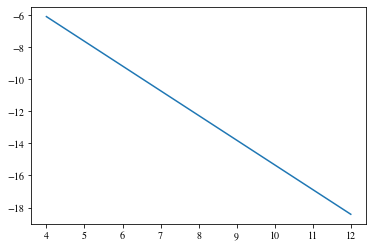

In [1254]:
k = 5
plt.plot(optimize_param_list, E_list_list_746782[k])
# plt.plot(N_free_params_list_836273, E_list_list_836273[:,k])

### t_- = 0.5

In [1443]:
model_args = [1, 0.5, 0.1]
run_id = 938483
# delete_group(run_id)
res_4 = client_cluster.submit(get_initila_data_MQ, run_id, N_lays_list, N_sys_list, edge_size, model_args, MODEL_TAG, 
                   opt_props, params_init_list, alpha, pure = False)

In [1570]:
run_id = 938483
res_4 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_3_F', reverse = False, pure = False)

In [1533]:
# print_structure(938483)

In [60]:
# res_4.result()

In [1196]:
# run_id = 938483
# with Lock(DB_FILE_NAME_PHONONES):
#     run_id = get_group_attrs([run_id, 0, 4], 'inF')
# run_id

# Robustness

In [70]:
opt_props = Optimiz_props( tol_rel = 1e-4, maxiter = 1, print_data=True)
MODEL_TAG = TAG_SSH_P
params_init_list = 10**np.linspace(np.log10(0.001), np.log10(0.1), 3)
N_sys = 6
dim_aux = 7

N_params_list = np.arange(6,21)
n_phon_list = 10**np.linspace(np.log10(0.001), np.log10(0.1), 21)
mps_circ = MPS_Circuit(size_block = 3, N_bulk_blocks = 2)

optimize_tag = OPT_TAG_N_PHON
optimize_param_list = n_phon_list
fixed_param = N_sys

# opt_props = Optimiz_props( tol_rel = 1e-1, maxiter = 0, print_data=False)
# MODEL_TAG = TAG_SSH_P
# params_init_list = 10**np.linspace(np.log10(0.001), np.log10(0.1), 1)
# N_sys = 6
# dim_aux = 10

# N_params_list = np.arange(6,21)
# n_phon_list = 10**np.linspace(np.log10(0.001), np.log10(0.1), 21)
# mps_circ = MPS_Circuit(size_block = 3, N_bulk_blocks = 2)

# optimize_tag = OPT_TAG_N_PHON
# optimize_param_list = n_phon_list
# fixed_param = N_sys

In [71]:
model_args = [1, 0.5, 0.1]
run_id = 573583
# delete_group(run_id)

res_3 = client_cluster.submit(get_initila_data_MPS, run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
                   opt_props, optimize_tag, params_init_list, dim_aux = dim_aux, pure = False)

In [276]:
# res_3.result()

In [115]:
for r in res_3.result():
    if r.status == 'error':
        print(r.result())

In [84]:
# print_structure(573582)

In [1885]:
# run_id = 573582
# with Lock(DB_FILE_NAME_PHONONES):
#     names_list_1 = get_subgroup_names([run_id])
#     for name_1 in names_list_1:
#         names_list_2 = get_subgroup_names(replace_corrupted([run_id, name_1]))
#         for name_2 in names_list_2:
#             names_list_3 = get_subgroup_names(replace_corrupted([run_id, name_1, name_2]))
# #             print([name_1, name_2], names_list_3)
# #             try:
# #                 get_data_min_E([run_id, name_1, name_2])
# #             except:
#             print([run_id, name_1, name_2])
#             for name_3 in names_list_3:
#                 path = [name_1, name_2, name_3]
#                 try:
#                     is_exist(path)
#                 except:
#                     print('err :',path)

In [1886]:
# delete_sub_group([573582, '11', '1'])

In [1819]:
# res_3.result()

In [1700]:
# print_structure(8823692)

In [57]:
run_id = 573583
res_31 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_3_F', reverse = False, pure = False)
res_32 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_3_B', reverse = True, pure = False)

In [46]:
res_31.result()

array([[<Future: status: finished, key: submit_re_optimization-1fb91f15-fb46-4e40-843f-8c5c9a9aa3b9>,
        <Future: status: finished, key: submit_re_optimization-a7501197-dc06-4f65-bfc8-eea337d55379>,
        <Future: status: finished, key: submit_re_optimization-29bc4c62-3293-45ac-a11d-64a6f32e52e5>,
        <Future: status: finished, key: submit_re_optimization-755b3944-9daa-4791-bf39-d9a07d7f376d>,
        <Future: status: finished, key: submit_re_optimization-f13f3fe1-dd29-4abb-afdf-c31233573893>,
        <Future: status: finished, key: submit_re_optimization-0ad5ed89-3bed-40b9-b4f8-a880dff17881>,
        <Future: status: finished, key: submit_re_optimization-27ea4015-bc00-406f-8c98-aaa119ede69d>,
        <Future: status: finished, key: submit_re_optimization-5739fc74-9064-4b79-aec7-ecceee84279f>,
        <Future: status: finished, key: submit_re_optimization-2fb15a94-1a53-477c-81bf-69f7fce0a381>,
        <Future: status: finished, key: submit_re_optimization-b167390a-2402-4aae-

In [75]:
run_id = 573583
res = submit_calculate_inF_and_cors(run_id, do_inF = True, do_cors = False)

In [293]:
res

[<Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-916efbc7-effa-4063-b3cd-5d7452c8bfad>,
 <Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-66c8f3c3-97f5-43a7-aee9-047611ad7f09>,
 <Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-873f210c-67bf-4b1b-9570-a254cf9b7c68>,
 <Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-e22662e4-3459-4440-b7d3-424e44ce08ef>,
 <Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-c15bdb5e-8757-4b6c-ac14-e45ef4439be2>,
 <Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-abbcb22e-2cd1-45a0-9868-907ce49cc0c4>,
 <Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-00e5b039-1d49-4887-a7cf-a4fabe946e8b>,
 <Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-4ad6204f-ac6b-4b7d-85f1-70de0e693de7>,
 <Future: status: cancelled, type: NoneType, key: calculate_inF_and_cors-537f2464-b657-4c4c-93e6-c719c11

In [172]:
for r2 in res_32.result():
    for r in r2:
        r.cancel()

In [109]:
get_group_attrs_names([573582, 0, 20])

['E_min', 'inF', 'inP', 'params_opt']

In [87]:
get_group_attrs([573582, 0, 1],  'inF')

0.8661476811144831

In [88]:
get_subgroup_names([573582, 0, 1])

['0']

In [90]:
get_group_attrs([573582, 0, 20,'0'],'E')

-0.20010336061442086

In [82]:
get_subgroup_names([573582, 0, 1])

['0']

In [59]:
res[54]

<Future: status: finished, type: NoneType, key: calculate_inF_and_cors-5995e3e5-3ed0-4252-8960-726752d48a90>

# Correlators MPS with MS

In [31]:
opt_props = Optimiz_props( tol_rel = 1e-4, maxiter = 1, print_data=False)
MODEL_TAG = TAG_SSH_P
params_init_list = 10**np.linspace(np.log10(0.001), np.log10(0.1), 3)
N_sys_list = np.arange(6,32,2)

In [32]:
N_params_list = np.arange(2,6)
mps_circ = MPS_Circuit(size_block = 3, N_bulk_blocks = 2)

optimize_tag = OPT_TAG_N_SYS
optimize_param_list = N_sys_list
fixed_param = 0
is_MS = True

In [286]:
model_args = [1, 0.5, 0.1]
run_id = 8374123135
# delete_group(run_id)
res_10 = client_cluster.submit(get_initila_data_MPS, run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
                   opt_props, optimize_tag, params_init_list, None, is_MS, pure = False)

In [291]:
res_10.result()

[<Future: status: finished, type: NoneType, key: submit_optimization-654d2389-38bf-424e-9869-bbb3969a4d05>,
 <Future: status: finished, type: NoneType, key: submit_optimization-6f5ee015-30a7-44aa-ac15-4e5e70928890>,
 <Future: status: finished, type: NoneType, key: submit_optimization-da049152-3004-404a-931a-b750d7e26767>,
 <Future: status: finished, type: NoneType, key: submit_optimization-8eade182-9886-4c39-b4d9-532ea9fcee47>,
 <Future: status: finished, type: NoneType, key: submit_optimization-61d28a07-a1b9-492b-96f5-b6f3907f074f>,
 <Future: status: finished, type: NoneType, key: submit_optimization-79c9ce0b-eba8-4be5-af59-ca64f1f7eb2e>,
 <Future: status: finished, type: NoneType, key: submit_optimization-dffd24f6-63fe-4c55-9687-ddc27764986d>,
 <Future: status: finished, type: NoneType, key: submit_optimization-8e16a0fd-b22c-484a-a99b-54cf55c34e8a>,
 <Future: status: finished, type: NoneType, key: submit_optimization-65c3ffa8-4e44-49a9-9b10-5e99332f0f88>,
 <Future: status: finished, 

In [314]:
run_id = 8374123135
res_101 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_3_F', reverse = False, pure = False)
res_102 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_3_B', reverse = True, pure = False)

In [301]:
res_102.result()

array([[<Future: status: pending, key: submit_re_optimization-29d995ae-7264-485b-b7f3-eb9b6eafe9a9>,
        <Future: status: pending, key: submit_re_optimization-182120ad-5689-48ba-8b51-731458ae8add>,
        <Future: status: pending, key: submit_re_optimization-8ff19ae2-1aec-4d30-965b-3d4814ea69a3>,
        <Future: status: pending, key: submit_re_optimization-cf293168-692a-40df-9c2a-0e255969f7a3>,
        <Future: status: finished, key: submit_re_optimization-3aa4a120-f421-4639-8980-a0654dfb443d>,
        <Future: status: finished, key: submit_re_optimization-a2034f81-7ffe-4608-b291-9342d4da40fe>,
        <Future: status: finished, key: submit_re_optimization-442ff323-8c2b-473d-9762-e2f99221cc40>,
        <Future: status: finished, key: submit_re_optimization-81600bec-33c6-49c5-b974-987f38189736>,
        <Future: status: finished, key: submit_re_optimization-be8b511e-da0d-4bd8-a511-cdd4c053ef2f>,
        <Future: status: finished, key: submit_re_optimization-703c6ef7-98b9-4850-891a

In [321]:
run_id = 8374123135
res = submit_calculate_inF_and_cors(run_id, do_inF = False, do_cors = True)

In [252]:
res

[<Future: status: finished, type: NoneType, key: calculate_inF_and_cors-fa37ff3b-c07b-47e3-bf77-ff40719b5770>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-1bbb6fae-4753-4962-bca0-54ce52c27eaa>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-e37e7c26-f7d5-4315-894d-b127d9cf13fe>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-a1e3a14e-7c2b-4e4e-9833-3667f3096e90>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-b9dfc723-8657-4061-9c70-ab18d78f2cb1>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-6a35a7a4-d4db-4767-adba-49e974668394>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-b25a6455-e50a-4712-b5b2-aaa499e4726e>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-dcac539a-1f2c-4b79-a2b8-bdb82b8fb7e5>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-c2b463c8-281a-4f4c-b34f-8917aa9a09a5>,
 

In [70]:
get_group_attrs([run_id,0,0], 'E_min')

-37.45384626140876

# Correlators t-=0.5

In [48]:
opt_props = Optimiz_props( tol_rel = 1e-2, maxiter = 1, print_data=True)
MODEL_TAG = TAG_SSH_P
params_init_list = 10**np.linspace(np.log10(0.001), np.log10(0.1), 3)
N_sys_list = np.arange(6,32,2)

In [49]:
N_params_list = np.arange(6,23)
n_phon = 0.01
mps_circ = MPS_Circuit(size_block = 3, N_bulk_blocks = 2)

optimize_tag = OPT_TAG_N_SYS
optimize_param_list = N_sys_list
fixed_param = n_phon

In [50]:
model_args = [1, 0.5, 0.1]
# run_id = 3234324
run_id = 76323266633
# delete_group(run_id)

res_9 = client_cluster.submit(get_initila_data_MPS, run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
                   opt_props, optimize_tag, params_init_list, pure = False)

In [368]:
with Lock(DB_FILE_NAME_PHONONES):
    print(get_subgroup_names([76323266633,i]))

['10', '11', '12', '8', '9']


In [375]:
K=0
with Lock(DB_FILE_NAME_PHONONES):
    for i in range(17):
        for j in range(13):
            if not is_exist(get_subgroup_names([76323266633,i,j])):
                K+=1

In [379]:
get_subgroup_names([76323266633,16])

['10', '11', '12', '5', '8', '9']

distributed.scheduler - CRITICAL - Tried writing to closed comm: {'op': 'lost-data', 'key': 'submit_optimization-24140123-ea36-4197-95ca-e2310af3e17b'}
distributed.scheduler - CRITICAL - Tried writing to closed comm: {'op': 'lost-data', 'key': 'submit_optimization-6fed42a6-a3f2-468d-8660-ce01418a3f43'}
distributed.scheduler - CRITICAL - Tried writing to closed comm: {'op': 'lost-data', 'key': 'submit_optimization-a1aff95b-8e98-47f4-84ef-8fca5da82c65'}
distributed.scheduler - CRITICAL - Tried writing to closed comm: {'op': 'lost-data', 'key': 'submit_optimization-48bbf922-8606-4902-883e-79bd05befea9'}
distributed.scheduler - CRITICAL - Tried writing to closed comm: {'op': 'lost-data', 'key': 'submit_optimization-dc6201e3-98ef-46fa-86db-3d610b806f62'}
distributed.scheduler - CRITICAL - Tried writing to closed comm: {'op': 'lost-data', 'key': 'submit_optimization-6c5b6ad2-bc4f-4e74-b94a-fd27cfe3c8f0'}
distributed.scheduler - CRITICAL - Tried writing to closed comm: {'op': 'lost-data', 'ke

In [386]:
res_9.result()

[<Future: status: finished, key: submit_optimization-99519175-17e5-4d0d-8a2f-4d13e6fa2fa8>,
 <Future: status: finished, key: submit_optimization-b1ced409-83a4-42ac-a885-7da2d28c4129>,
 <Future: status: finished, key: submit_optimization-bf4d494b-cea4-487a-a3c1-1d9d12e04c84>,
 <Future: status: finished, key: submit_optimization-ccab56be-f40c-46a2-b3e2-6e6df4dcbab6>,
 <Future: status: finished, key: submit_optimization-caaff5cc-a819-4e0b-bcd8-aee1ea49b95f>,
 <Future: status: finished, key: submit_optimization-09d9e992-2346-482d-a3db-af2ffe7981e8>,
 <Future: status: finished, key: submit_optimization-2190f10d-b990-4422-af9e-110509f2ddcf>,
 <Future: status: finished, key: submit_optimization-6156fb29-08e5-4bb8-a604-40efd694f19a>,
 <Future: status: finished, key: submit_optimization-cb9a2fe9-963b-4cb5-9724-98988c4fd347>,
 <Future: status: pending, key: submit_optimization-edab8ee6-9c34-4052-ac15-d7638b26bac2>,
 <Future: status: pending, key: submit_optimization-2cedba8b-de58-443f-8f6c-81a77

In [91]:
# run_id = 3234324
run_id = 76323266633
res_91 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_6_F', reverse = False, pure = False)
res_92 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_6_B', reverse = True, pure = False)

In [16]:
res_92.result()

NameError: name 'res_92' is not defined

In [47]:
# sum(r.status is not 'finished' for r in res_9.result())

In [2155]:
# print_structure(3234324)

In [65]:
# run_id = 3234324
run_id = 76323266633
res = submit_calculate_inF_and_cors(run_id, do_inF = False, do_cors = True, n_phon_pur = 2)

In [63]:
res

[<Future: status: finished, type: NoneType, key: calculate_inF_and_cors-e66f8bf7-b197-4ce9-8257-95bc397fb9ff>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-2ad426ce-5d1c-4c0c-8954-43d57ed8371f>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-51c7c483-aa2e-4543-857b-c63891a6fffd>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-d3681a33-979a-4cc5-a7c8-81b14dad7caf>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-3a3e1628-be74-4a9b-ac70-c87166804cb1>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-44bfcf60-f949-493c-a23a-aaf568ced289>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-3d5409b2-f5a7-4734-a419-547a4ff41f96>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-2d99f6a7-14f0-422c-9e7d-4874dec94897>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-1b8f0df0-ce5e-4bce-aa0a-6432bb5fd2f5>,
 

In [64]:
get_group_attrs_names([76323266633, 1, 2])

['E_cors',
 'E_min',
 'E_min_n_pon_pur_0',
 'E_min_n_pon_pur_1',
 'E_min_n_pon_pur_2',
 'entr_val',
 'n_val',
 'norm_div',
 'params_opt',
 'pur_val',
 'var_val']

In [48]:
get_group_attrs([76323266633, 15, 10, '0'], 'E', 'E_min')

-15.334975560132316

In [29]:
get_group_attrs([76323266633, 14, 10, '1'], 'E', 'E_min')

[-15.330980300584129, -15.188128985505676]

In [155]:
sum(r.status == 'error' for r in res)

0

In [ ]:
# run_id = 3234324
run_id = 76323266633
N_free_params_list, E_list_list, optimize_param_list, optimize_tag = retreave_data(run_id)
plot_data(E_list_list, optimize_param_list, N_free_params_list, title = '1-F', x_lable = '# ions', y_lable = '# params', log_norm = False)

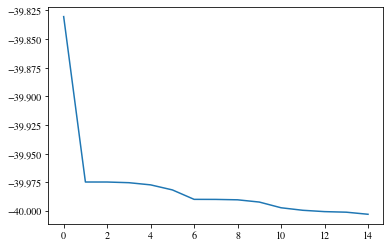

In [1701]:
plt.plot(E_list_list[:,-3])

# Several traps

In [21]:
N_sys_0 = 6
N_traps_max = 5
N_sys_list = np.arange(1, N_traps_max+1)*N_sys_0
N_bulk_gates = 14
mps_circ = MPS_Circuit(N_bulk_gates=N_bulk_gates, size_block = 3, N_bulk_blocks = 2, size_M = 2, N_lays_M = 1 )
N_phon_list = np.linspace(0,0.01,3)

MODEL_TAG = TAG_SSH_P
model_args = [1, 0.5, 0.1]
opt_props = Optimiz_props( tol_rel = 1e-2, maxiter = 1)
n_phon = 0.01

In [25]:
simulator = get_MPS_simulator_with_traps(N_sys_0 * 1, mps_circ, model_args, MODEL_TAG, 
                                                 opt_props, n_phon = n_phon, N_traps=1, is_free=True)
simulator.N_free_params

18

In [13]:
# run_id =5478389741
run_id =738173894
# delete_group(run_id)

N_sys_0 = 6
N_traps_max = 5
N_sys_list = np.arange(1, N_traps_max+1)*N_sys_0
N_bulk_gates = 14
mps_circ = MPS_Circuit(N_bulk_gates=N_bulk_gates, size_block = 3, N_bulk_blocks = 2, size_M = 2, N_lays_M = 1 )
N_phon_list = np.linspace(0,0.01,3)

MODEL_TAG = TAG_SSH_P
model_args = [1, 0.5, 0.1]

params_init_list = list(10**np.linspace(np.log10(0.001), np.log10(0.1), 5))

opt_props = Optimiz_props( tol_rel = 1e-2, maxiter = 1)

# res_6 = client_cluster.submit(get_initila_data_MPS, run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
#                    opt_props, optimize_tag, params_init_list, pure = False)
res_6 = get_initila_data_MPS( run_id, N_sys_list, N_phon_list, N_bulk_gates, mps_circ, model_args, MODEL_TAG, 
                   opt_props, OPT_TAG_N_TRAPS, params_init_list, dim_aux = None, is_MS = False)

In [61]:
res_6

[<Future: status: cancelled, type: NoneType, key: submit_optimization-2cd8028d-ffdb-40ef-8822-2992cc255ba2>,
 <Future: status: cancelled, type: NoneType, key: submit_optimization-8bbb4dc6-0359-4ed1-a9d6-3a3aa2ee08ea>,
 <Future: status: cancelled, type: NoneType, key: submit_optimization-347caf63-2892-443c-a9f5-47aa4587a99b>,
 <Future: status: cancelled, type: NoneType, key: submit_optimization-8f6a10c9-2187-4fbb-9c5e-c4e8db513441>,
 <Future: status: cancelled, type: NoneType, key: submit_optimization-559efcc1-5d9d-4e47-8609-c2219d5ee3e4>,
 <Future: status: cancelled, type: NoneType, key: submit_optimization-f7558a6b-38c0-4850-9abe-a2f43e80cf1a>,
 <Future: status: cancelled, type: NoneType, key: submit_optimization-7285950b-55c4-4396-bc22-feff3a9436cf>,
 <Future: status: cancelled, type: NoneType, key: submit_optimization-2b56d8f6-6370-4c66-9a89-038d7287621d>,
 <Future: status: cancelled, type: NoneType, key: submit_optimization-8adbaa2f-c4d3-47ec-adb5-8689e7376f4a>,
 <Future: status: c

In [13]:
run_id = 738173894
res_61 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_1_F', reverse = False, pure = False)
res_62 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_1_B', reverse = True, pure = False)

In [21]:
res_62.result()

array([[<Future: status: pending, key: submit_re_optimization-a8212d8f-a5ca-4ae3-a0c0-beff0e9bc0e0>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-d3b2d9b8-48d3-40ac-bebe-d944567871d3>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-f90f1165-ba66-4733-a0ee-0fe7be67adce>],
       [<Future: status: finished, type: NoneType, key: submit_re_optimization-e72b9940-6154-48a1-9a04-d8e7a0eddbb7>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-8af74651-27b6-4782-b215-92c0cbe14d55>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-0a58ce10-dcc1-4eb8-ae99-80d767dc6200>],
       [<Future: status: finished, type: NoneType, key: submit_re_optimization-b774f1a1-9c9a-4a53-b805-b3f84a0f6d8a>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-3a70ca2c-f12c-4e41-a3db-a004d83c11ee>,
        <Future: status: finished, type: NoneType, key: submit_re_optim

In [22]:
res_61.result()

array([[<Future: status: finished, key: submit_re_optimization-4422c15a-739c-44cc-86a9-2f7dbe13a5d7>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-c8f7affc-e4f7-4a3d-bf8e-e617e96defaa>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-6020e487-c43d-4890-9f66-4297aa272569>],
       [<Future: status: finished, type: NoneType, key: submit_re_optimization-54bdabfe-5bbe-4922-8141-262a31c82e93>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-eae3c837-ca9d-47dd-8758-e6156af7a82c>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-847ef872-54b1-4952-8590-8f7f51a3a98e>],
       [<Future: status: finished, type: NoneType, key: submit_re_optimization-482a6222-fa96-408c-9827-30b99d56b72e>,
        <Future: status: finished, type: NoneType, key: submit_re_optimization-99ddbc94-0a50-433a-9560-0e0e45e8a8cb>,
        <Future: status: finished, type: NoneType, key: submit_re_opti

In [37]:
run_id = 738173894
res = submit_calculate_inF_and_cors(run_id, do_inF = False, do_cors = True)

In [44]:
res

[<Future: status: finished, type: NoneType, key: calculate_inF_and_cors-d9c658a7-bc6e-43f3-ac42-5f780d1641ed>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-9b2f4599-3002-4800-9c22-99edcfc83c78>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-f276e4e5-2829-41c0-a5a8-2b62eb8b206c>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-2d719098-7a43-4b02-b2c5-996c5ac5d02c>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-009e5aee-3d8e-482e-9aec-cf862655b560>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-e6376bc6-0163-436f-be1d-53e55691b7e7>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-1733a955-5609-4afb-9807-da7f52ba488e>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-7cfa9611-db0f-4a4b-80d8-c46da1d85218>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-45750079-be40-4888-a1ca-c86924411432>,
 

In [37]:
get_group_attrs_names([738173894,0,0])

['E_cors',
 'E_min',
 'entr_val',
 'n_val',
 'norm_div',
 'params_opt',
 'pur_val',
 'var_val']

In [25]:
get_subgroup_names([738173894,0,0])

['0',
 '1',
 '2',
 '3',
 '4',
 'reopt_0_B_0',
 'reopt_0_B_1',
 'reopt_1_B_0',
 'reopt_1_B_1',
 'reopt_1_B_spec_2']

In [177]:
delete_sub_group([5478389741,4,1,'reopt_0_B_0'])

In [45]:
E_min_list_traps = [get_group_attrs([738173894,i,0], 'E_min') for i in range(5)]

In [42]:
E_min_list_traps

[-46.078546915404715,
 -36.80696581679311,
 -27.594934225456225,
 -18.40947457823694,
 -9.148205210097611]

In [46]:
E_min_list_traps

[-46.15018044913737,
 -36.90420079336024,
 -27.658221941749055,
 -18.412248568266524,
 -9.166450235614924]

In [215]:
i = 0
get_group_attrs([76323266633,8,i*3], 'params_opt'), get_group_attrs([76323266633,8,i*3], 'E_min')

(array([-4.15338618e-01, -6.37923915e-01, -1.42143401e-03, -9.85079195e-04,
         1.08991875e+00,  1.25057048e+00, -5.34316729e+00,  1.49762215e+00,
         1.71948523e-02, -1.41713261e+00,  4.95932663e+00,  7.82267981e-01,
         2.44707786e+00,  8.94292676e-02, -2.47661749e+00, -1.40373744e+00,
         1.05990551e+00,  1.21240932e+00]), -46.154978527426955)

In [29]:
E_min_list = [get_group_attrs([76323266633,8,i*3], 'E_min') for i in range(5) ]

In [31]:
E_min_list

[-46.154978527426955,
 -36.9077077814111,
 -27.660531346866396,
 -18.413435568226767,
 -9.166450240098085]

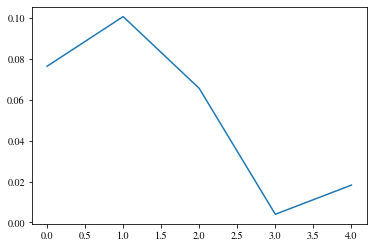

In [43]:
plt.plot(np.array(E_min_list_traps)-np.array(E_min_list))

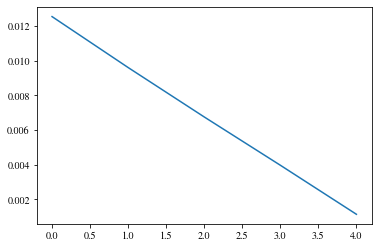

In [84]:
plt.plot(np.array(E_min_list_traps)-np.array(E_min_list))

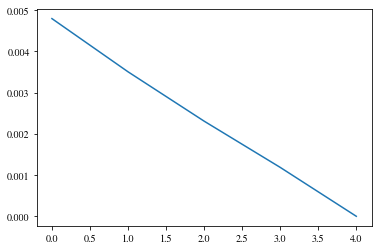

In [47]:
plt.plot(np.array(E_min_list_traps)-np.array(E_min_list))

# Correlators t-=0.2

In [166]:
opt_props = Optimiz_props( tol_rel = 1e-2, maxiter = 1, print_data=False)
MODEL_TAG = TAG_SSH_P
params_init_list = 10**np.linspace(np.log10(0.001), np.log10(0.1), 3)
N_sys_list = np.arange(6,32,2)

In [167]:
N_params_list = np.arange(6,21)
n_phon = 0.01
mps_circ = MPS_Circuit(size_block = 3, N_bulk_blocks = 2)

optimize_tag = OPT_TAG_N_SYS
optimize_param_list = N_sys_list
fixed_param = n_phon

In [168]:
model_args = [1, 0.2, 0.1]
# run_id = 3234324
run_id = 68567762323
# delete_group(run_id)

res_5 = client_cluster.submit(get_initila_data_MPS, run_id, N_params_list, optimize_param_list, fixed_param, mps_circ, model_args, MODEL_TAG, 
                   opt_props, optimize_tag, params_init_list, pure = False)

In [179]:
res_5.result()

[<Future: status: finished, key: submit_optimization-f7e382db-f2c9-4783-be57-2ec4031cd0dc>,
 <Future: status: finished, key: submit_optimization-f842276b-bf38-4c60-b9a2-d5537eeeb796>,
 <Future: status: finished, key: submit_optimization-eae5ab53-a967-49d1-881d-707cac4b6dda>,
 <Future: status: finished, key: submit_optimization-b5fee187-1003-446d-9f38-f08bf1961a95>,
 <Future: status: finished, key: submit_optimization-92826dd4-1247-428e-b23f-d1b5454599e2>,
 <Future: status: finished, key: submit_optimization-e255c951-ddfc-4c01-946b-76279b1d8731>,
 <Future: status: finished, key: submit_optimization-861ea4cc-6afd-4d43-b1cd-bca74788a1bd>,
 <Future: status: finished, key: submit_optimization-b984b851-6c56-46ce-89b2-6a5975cb2c4e>,
 <Future: status: finished, key: submit_optimization-df6ba403-56fb-4b0e-ae24-8839a8b5d998>,
 <Future: status: finished, key: submit_optimization-13c9909f-3557-44de-b6e9-da97e0100b0a>,
 <Future: status: finished, key: submit_optimization-c8013d03-fa32-41f8-98cb-ab5

In [42]:
run_id = 68567762323
res_51 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_2_F', reverse = False, pure = False)
res_52 = client_cluster.submit(reoptimize_data, run_id, reopt_id = 'reopt_2_B', reverse = True, pure = False)

In [43]:
res_52.result()

array([[<Future: status: pending, key: submit_re_optimization-e1e310a1-7477-4a39-ba3e-a8dce79e561a>,
        <Future: status: pending, key: submit_re_optimization-4a2fcb8f-d1a6-4f8c-98af-ed6e3eddb1e1>,
        <Future: status: pending, key: submit_re_optimization-acc1e45f-d7c4-4cfe-ba71-e74b27314d14>,
        <Future: status: pending, key: submit_re_optimization-0f559467-8465-490e-8167-410ac70d5c21>,
        <Future: status: pending, key: submit_re_optimization-6e37d32e-ef0d-4a47-81b5-e98a1eabfc17>,
        <Future: status: pending, key: submit_re_optimization-1f3782a9-6c54-4129-b0b2-148b7eb7f995>,
        <Future: status: pending, key: submit_re_optimization-f17c0929-dd99-4de3-b66b-582ed6a809f3>,
        <Future: status: pending, key: submit_re_optimization-e3fb3f84-8888-49ba-a8dc-120e4945b3d0>,
        <Future: status: pending, key: submit_re_optimization-7e07dc88-a0c0-4adf-8a4e-391b3468e460>,
        <Future: status: pending, key: submit_re_optimization-d8d6d494-4c94-4aeb-b286-e0f4f

In [70]:
run_id = 68567762323
res = submit_calculate_inF_and_cors(run_id, do_inF = False, do_cors = True)

ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=OSError("Timed out trying to connect to 'tcp://192.168.39.46:40670' after 3 s: in <distributed.comm.tcp.TCPConnector object at 0x7fe1b3117940>: ConnectionRefusedError: [Errno 111] Connection refused")>
Traceback (most recent call last):
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/comm/core.py", line 218, in connect
    quiet_exceptions=EnvironmentError,
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 735, in run
    value = future.result()
tornado.util.TimeoutError: Timeout

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.throw(*exc_info)  # type: ignore
  File "/scratch/x2241057/miniconda3/lib/python3.7/site-packages/distributed/scheduler.py", line 2685, 

In [38]:
res

[<Future: status: finished, type: NoneType, key: calculate_inF_and_cors-2d32ce60-6a1d-4065-b263-fee4b23e41a2>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-52f261a2-46da-401c-b048-b14e713f96e3>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-923013e6-9ce4-4e4d-ae71-b44d2433fbe0>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-68834072-176b-4d8e-b2fc-7315bebced87>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-0cd31733-09cb-4748-b3a3-b275a4671ad0>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-2f39c869-04e2-447b-90c5-f097b9ed1844>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-e3e7e2ad-4fdc-4088-8646-d5fd338bdee4>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-059455a0-7337-4c99-9ad9-66515365256c>,
 <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-2987aabf-fd1b-4ad5-8b85-952237946e82>,
 

# inF, cors

In [14]:
# run_id_list = [746782, 93761231, 836273, 938483, 8823692]
# run_id_list = [746782, 93761231]
run_id_list = [938483, 836273]
res_list = []
for run_id in run_id_list:
    res = submit_calculate_inF_and_cors(run_id, do_inF = True, do_cors = True)
    res_list += [res]

In [19]:
get_group_attrs_names([938483, 0,0])

['E_cors',
 'E_min',
 'entr_val',
 'inF',
 'inP',
 'n_val',
 'norm_div',
 'params_opt',
 'pur_val',
 'var_val']

In [17]:
res_list

[[<Future: status: finished, type: NoneType, key: calculate_inF_and_cors-bc9ad2b5-d7f4-4e95-8c9c-7013c2279512>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-c311a641-2cd1-4cb3-9b81-a468c0d83d98>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-a265867f-9ef1-434f-976a-361d87c21ae8>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-6f5b4c46-b9a0-42fa-8e19-c2688fbf6144>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-5c1e1d4b-7be4-4b07-9451-3999cee4aeb9>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-0a62877b-0a68-4d15-9993-f4484b1dae97>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-4f1d84f7-3f3a-47e2-a0eb-7f9d2db3baf8>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-d535fb18-1507-4692-beb5-20f3ca4d93f3>,
  <Future: status: finished, type: NoneType, key: calculate_inF_and_cors-c4907a0e-9103-4454-83ac-7643f8d

In [1356]:
# res_11.result(), res_12.result(), res_21.result(), res_22.result(), res_91.result(), res_92.result()

In [1306]:
# for res in [res_11, res_12, res_21, res_22, res_91, res_92]:
#     print(res.result())

In [1327]:
# res_92.result()[0][0].result()

In [1414]:
sum(r.status is not 'finished' for r in np.ravel(res_11.result()))

3

In [1419]:
sum(r.status is not 'finished' for r in np.ravel(res_12.result()))

10

In [1427]:
sum(r.status is not 'finished' for r in np.ravel(res_21.result()))

13

In [1428]:
sum(r.status is not 'finished' for r in np.ravel(res_22.result()))

0

In [1401]:
# sum(r.status is not 'finished' for r in res_9.result())

In [1434]:
sum(r.status is not 'finished' for r in np.ravel(res_91.result()))

KilledWorker: ('reoptimize_data-86a9811c-7b96-4020-9c41-7cdbf96680a5', <Worker 'tcp://192.168.39.44:45114', memory: 0, processing: 21>)

In [1720]:
res_91

<Future: status: lost, type: ndarray, key: reoptimize_data-112cfa2d-308a-415a-8ac2-f309f1f22fdf>

In [1436]:
sum(r.status is not 'finished' for r in np.ravel(res_92.result()))

174